In [1]:
import pickle
import matplotlib.pyplot as plt

a_file = open("../models/20210808-231009/result_losses.pkl", "rb")
data = pickle.load(a_file)
a_file.close()

In [8]:
data["val_rmse_losses"]

[1.0288049541437863,
 1.032643304443571,
 1.0260442388558237,
 1.037339174115119,
 1.0230625046370985,
 1.0206300977564242]

In [6]:
train_losses = data["train_losses"]
val_losses = data["val_losses"]
val_rmse_losses = data["val_rmse_losses"]
print(len(train_losses))
print(len(val_losses))
print(len(val_rmse_losses))

508
2
2


In [18]:
val_losses.append(0)
val_rmse_losses.append(0)
val_losses[2] = val_losses[1]
val_losses[1] = val_losses[0]
val_losses[0] = 13.670837975042794
val_rmse_losses[2] = val_rmse_losses[1]
val_rmse_losses[1] = val_rmse_losses[0]
val_rmse_losses[0] = 3.697409630409213

In [27]:
print(val_losses)
print(val_rmse_losses)

[13.670837975042794, 1.242270215406496, 1.1266790029400349]
[3.697409630409213, 1.1145717632375656, 1.0614513662622678]


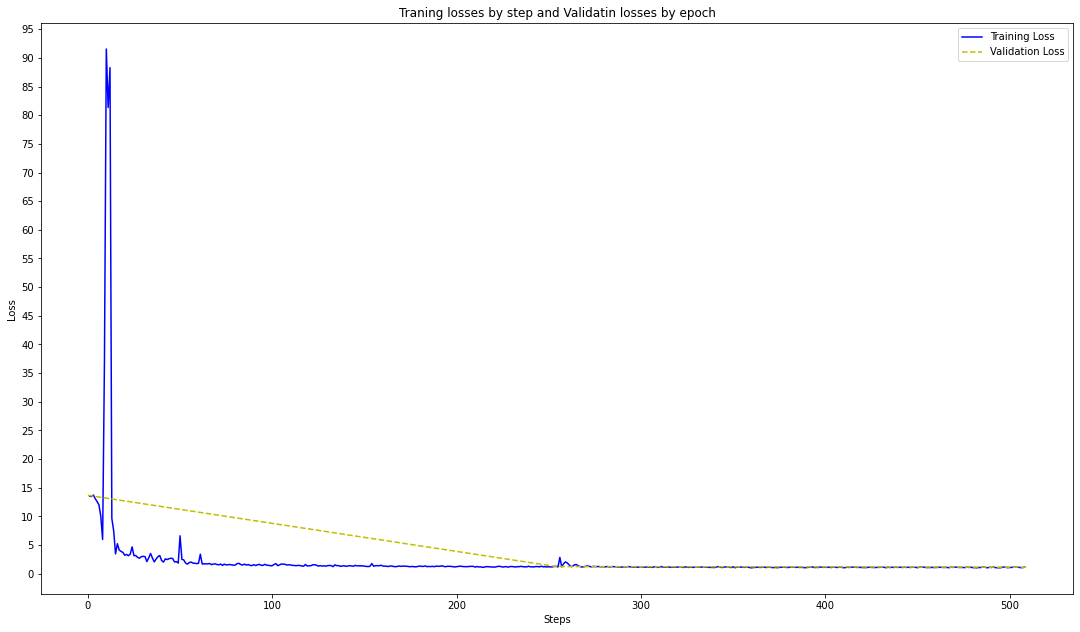

In [26]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

batch_count = [i + 1 for i in range(len(train_losses))]
epoch_count = [0,(len(train_losses) + 1) // 2, len(train_losses) + 1]

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_ticks(np.arange(0, 100, 5))

fig.set_size_inches(18.5, 10.5)
plt.plot(batch_count, train_losses, 'b-')
plt.plot(epoch_count, val_losses, 'y--')
plt.title("Traning losses by step and Validatin losses by epoch")
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()